In [3]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import yfinance as yf
from datetime import datetime, timedelta


In [9]:
#download market data
stock_name = 'AAPL'
end_date = datetime.today()
start_date = end_date - timedelta(days = 365)

stock_data = yf.download(
    stock_name,
    start = start_date,
    end= end_date
)
stock_data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-11-29,159.369995,161.190002,158.789993,160.240005,159.315369,88748200
2021-11-30,159.990005,165.520004,159.919998,165.300003,164.346176,174048100
2021-12-01,167.479996,170.300003,164.529999,164.770004,163.819229,152052500
2021-12-02,158.740005,164.199997,157.800003,163.759995,162.815063,136739200
2021-12-03,164.020004,164.960007,159.720001,161.839996,160.906128,118023100
...,...,...,...,...,...,...
2022-11-18,152.309998,152.699997,149.970001,151.289993,151.289993,74794600
2022-11-21,150.160004,150.369995,147.720001,148.009995,148.009995,58724100
2022-11-22,148.130005,150.419998,146.929993,150.179993,150.179993,51804100


In [10]:
returns = np.log(1 + stock_data['Adj Close'].pct_change())

In [13]:
mu , sigma = returns.mean(), returns.std()

In [16]:
np.random.normal(mu, sigma)

0.012395547312896235

In [18]:
sim_rets = np.random.normal(mu, sigma, len(stock_data))

In [20]:
initial_price = stock_data['Adj Close'].iloc[-1]

In [22]:
sim_prices = initial_price * (sim_rets + 1 ).cumprod()

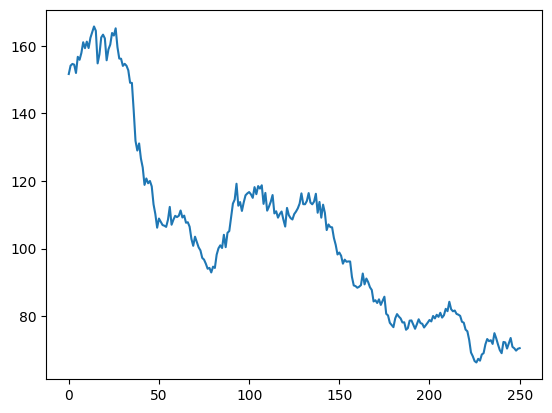

In [23]:
plt.plot(sim_prices)